In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np
from scipy.stats import kurtosis

# INPUT SIMULATION NAME

In [8]:
sim_name = "Simulation 1"
out_file_name = "OLD_Windows_with_STD"

## Get All Valid Runs From Sim Folder

In [9]:
df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")
# df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

df = df[df['Catastrophe Point Found?'] == True]

valid_runs = df['Run Number']

## Average Every Row For All Valid Files In Window and Output One Summary File Representing Average of All Files

In [10]:
# ## USE THIS ONE NEW ITER AND GETS STANDARD DEVIATION

# directory = f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Window\\{sim_name}"
# output_path = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Windows_with_STD.csv"

# # directory = f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/{sim_name}/"
# # output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Windows_with_STD.csv"

# column_names = [
#     'Window Num', 'Num Data Points in Row', 'Speculator Proportion', 'Market Price',
#     'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP',
#     'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades',
#     'Overall Sim Volatility', 'Pre-CUSP Market Price Difference',
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# averaged_data = []
# std_dev_data = []

# for row_index in range(100):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if 'Speculator Proportion' in run_df.columns:
#                 run_df['Speculator Proportion'] = run_df['Speculator Proportion'].str.rstrip('%').astype(float) / 100

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))
    
#     row_average = np.nanmean(row_values, axis=0)
#     row_std_dev = np.nanstd(row_values, axis=0)  # Calculate standard deviation
    
#     averaged_data.append(row_average)
#     std_dev_data.append(row_std_dev)

# std_dev_df = pd.DataFrame(std_dev_data, columns=column_names)
# std_dev_df.columns = [f"{col} STDV" for col in std_dev_df.columns]
# std_dev_df

# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# averaged_df

# combined_df = pd.DataFrame()
# for avg_col, std_col in zip(averaged_df.columns, std_dev_df.columns):
#     combined_df[avg_col] = averaged_df[avg_col]
#     combined_df[std_col] = std_dev_df[std_col]

# combined_df.to_csv(output_path, index=False)

# Load Data

In [11]:
df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\{out_file_name}.csv")
# df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/{out_file_name}.csv")
df['Window Num'] = df['Window Num'] + 1
df['Speculator Proportion'] = df['Speculator Proportion'] * 100
df

columns_of_interest = [
    'Speculator Proportion', 'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# 1. Understanding the Data

## 1.1 Data Table

In [12]:
df_1 = df.copy()

df_1.describe()

,Window Num,Window Num STDV,Num Data Points in Row,Num Data Points in Row STDV,Speculator Proportion,Speculator Proportion STDV,Market Price,Market Price STDV,Excess Demand,Excess Demand STDV,...,MP Volatility Last 100 Trades,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades,MP Volatility Last 10 Trades STDV,Overall Sim Volatility,Overall Sim Volatility STDV,Pre-CUSP Market Price Difference,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference,Last 100 Pre-CUSP Market Prices Difference STDV
count,100.000000,100.0,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.0,616.120598,8.121843e+01,64.473031,6.640716e-04,76.485691,11.880519,-197.989691,82.617951,...,3.233103,3.766110,1.788533,4.350776,4.380322,2.474703,33.741295,9.391630,17.168496,6.613248
std,29.011492,0.0,0.000000,2.856489e-14,0.285787,3.692567e-04,13.197925,6.446899,144.312433,52.635931,...,2.085953,1.040922,1.174171,1.888841,2.302160,0.251365,2.610246,1.666763,3.603061,0.346849
min,1.000000,0.0,616.120598,8.121843e+01,64.000000,1.065814e-14,54.252391,1.355232,-451.372465,4.358280,...,1.163470,1.838947,0.812763,1.023332,1.706121,1.793892,28.630416,3.979108,11.689221,5.751954
25%,25.750000,0.0,616.120598,8.121843e+01,64.229007,3.438266e-04,65.826846,5.828976,-323.664888,34.596691,...,1.589506,2.915006,1.078348,3.018147,2.475934,2.314813,31.629656,8.247721,14.473266,6.355627
50%,50.500000,0.0,616.120598,8.121843e+01,64.472828,6.614338e-04,74.306019,13.054444,-185.737994,81.814048,...,2.421864,3.643492,1.350255,4.104517,3.695615,2.537660,34.475774,9.824076,16.894344,6.684447
75%,75.250000,0.0,616.120598,8.121843e+01,64.716873,9.801191e-04,88.166841,18.007635,-64.400747,131.276315,...,4.490614,4.757792,2.176333,5.592960,6.028421,2.664775,35.596038,10.704484,19.490275,6.882595
max,100.000000,0.0,616.120598,8.121843e+01,64.960256,1.292419e-03,102.624621,20.896382,-1.935966,173.008028,...,10.316779,5.707202,6.918194,9.342549,11.154656,2.830180,41.544557,11.732232,26.591089,7.386407


## FIGURE 39 1.3 Correlation Matrix

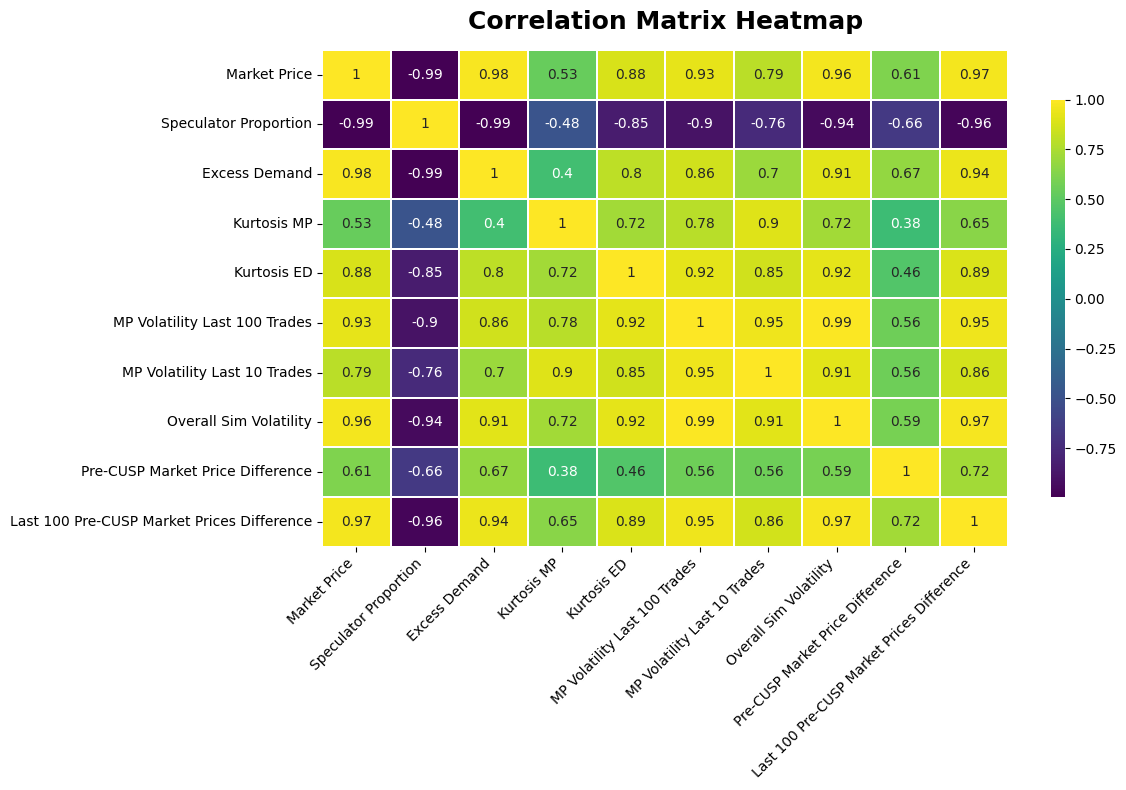

In [13]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Speculator Proportion', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df_2 = df_2[columns_of_interest]
df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()
corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='viridis', 
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10}, 
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# 2. Speculator Proportion Analysis Time

## FIGURE 40 - 2.1 Market Price

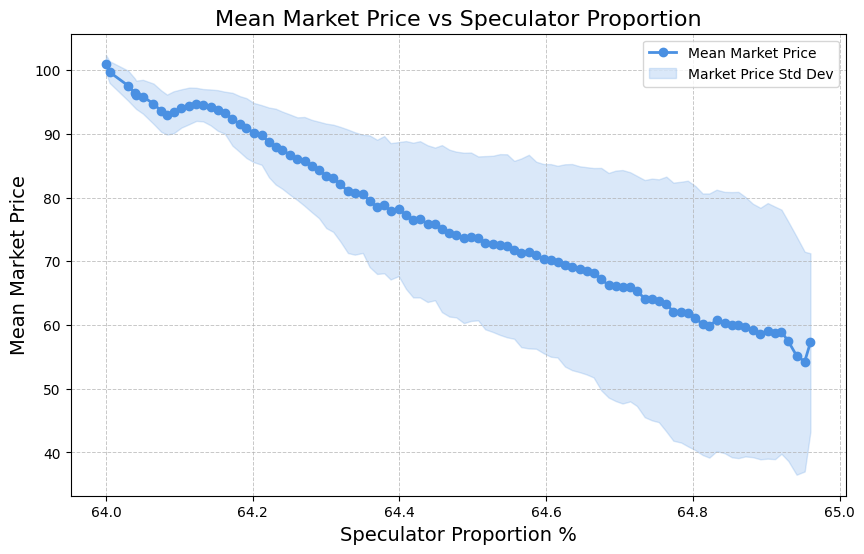

In [14]:
# Grouping by Speculator Proportion to get Mean and Standard Deviation
df_5 = df.copy()

grouped_df_1 = df_5.groupby('Speculator Proportion').agg(
    Mean_Market_Price=('Market Price', 'mean'),
    Market_Price_STDV=('Market Price STDV', 'mean')
).reset_index()

# Extracting data for plotting
speculator_proportion = grouped_df_1['Speculator Proportion']
mean_market_price = grouped_df_1['Mean_Market_Price']
market_price_std = grouped_df_1['Market_Price_STDV']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean market price using aesthetic blue
plt.plot(speculator_proportion, mean_market_price, 
         marker='o', color='#4A90E2', linestyle='-', linewidth=2, 
         label='Mean Market Price')

# Fill between for the standard deviation using the same blue with transparency
plt.fill_between(speculator_proportion,
                 mean_market_price - market_price_std,
                 mean_market_price + market_price_std,
                 color='#4A90E2', alpha=0.2, label='Market Price Std Dev')

# Adding labels and title
plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Mean Market Price', fontsize=14)
plt.title('Mean Market Price vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

# Show the plot
plt.show()


## FIGURE 41 2.2 Excess Demand

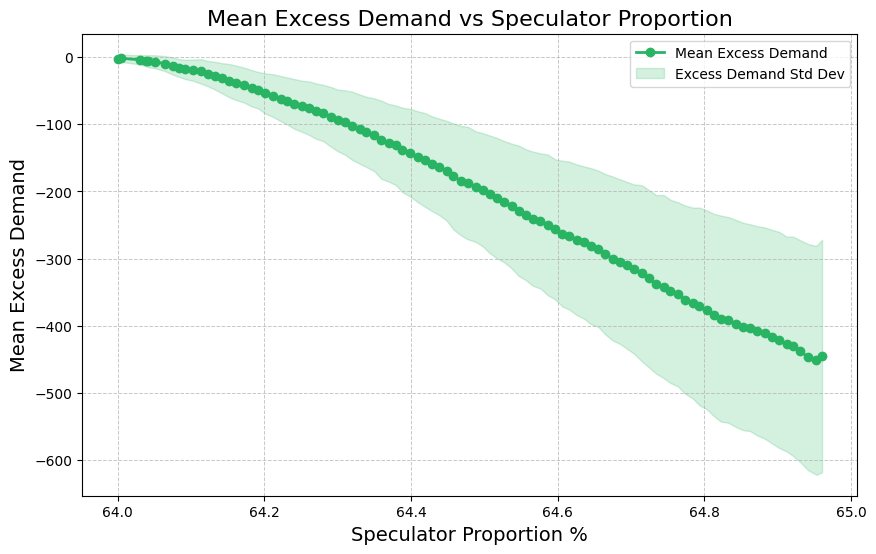

In [20]:
# Copy the DataFrame
df_6 = df.copy()

grouped_df_excess_demand = df_6.groupby('Speculator Proportion').agg(
    Mean_Excess_Demand=('Excess Demand', 'mean'),
    Excess_Demand_STDV=('Excess Demand STDV', 'mean')  # Assuming you have a column for STDV
).reset_index()

# Extracting data for plotting
speculator_proportion = grouped_df_excess_demand['Speculator Proportion']
mean_excess_demand = grouped_df_excess_demand['Mean_Excess_Demand']
excess_demand_std = grouped_df_excess_demand['Excess_Demand_STDV']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean excess demand using nice green
plt.plot(speculator_proportion, mean_excess_demand, 
         marker='o', color='#28B463', linestyle='-', linewidth=2, 
         label='Mean Excess Demand')

# Fill between for the standard deviation using the same green with transparency
plt.fill_between(speculator_proportion,
                 mean_excess_demand - excess_demand_std,
                 mean_excess_demand + excess_demand_std,
                 color='#28B463', alpha=0.2, label='Excess Demand Std Dev')

# Adding labels and title
plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Mean Excess Demand', fontsize=14)
plt.title('Mean Excess Demand vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

# Show the plot
plt.show()


## Figure 42 2.5 Market Price Difference (Last 100 Trades, Last Trade)

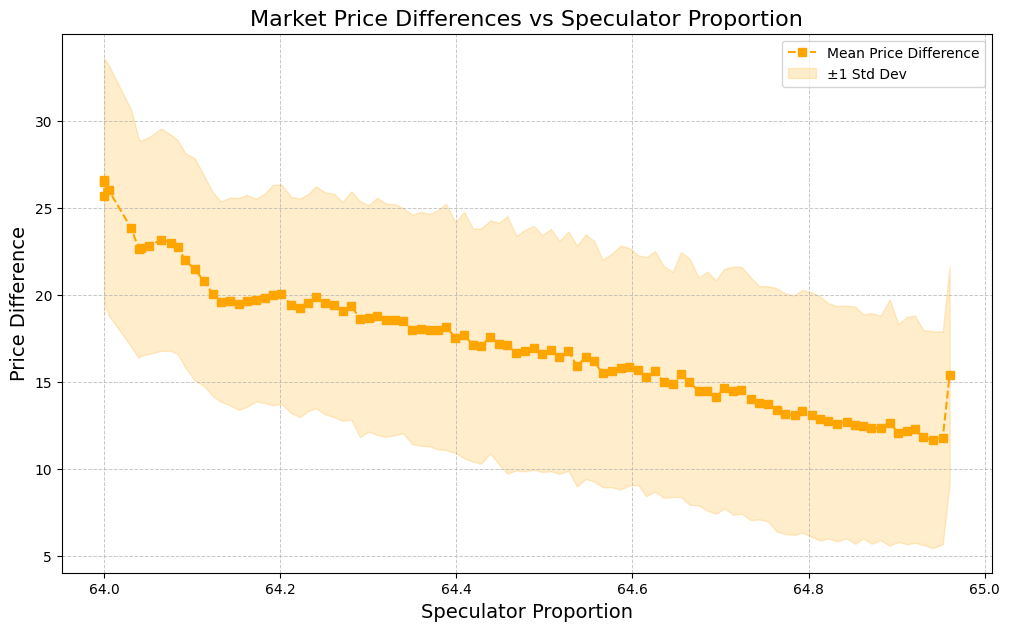

In [21]:
# Copy the DataFrame
df_9 = df.copy()

speculator_proportion = df_9['Speculator Proportion']
mean_price_difference = df_9['Last 100 Pre-CUSP Market Prices Difference']
std_price_difference = df_9['Last 100 Pre-CUSP Market Prices Difference STDV']

# Plotting
plt.figure(figsize=(12, 7))

# Plot mean price difference using aesthetic orange
plt.plot(
    speculator_proportion, mean_price_difference, 
    marker='s', linestyle='--', color='#FFA500', label='Mean Price Difference'
)

# Fill the area for standard deviation using the same orange
plt.fill_between(
    speculator_proportion,
    mean_price_difference - std_price_difference,
    mean_price_difference + std_price_difference,
    color='#FFA500', alpha=0.2, label='±1 Std Dev'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.title('Market Price Differences vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


## 3.3 Bifurcation Row

In [17]:
last_row = df.iloc[-1]
last_row

Window Num                                         100.000000
Window Num STDV                                      0.000000
Num Data Points in Row                             616.120598
Num Data Points in Row STDV                         81.218425
Speculator Proportion                               64.960256
Speculator Proportion STDV                           0.001292
Market Price                                        57.258292
Market Price STDV                                   13.992732
Excess Demand                                     -444.980790
Excess Demand STDV                                 173.008028
Kurtosis MP                                         -0.368409
Kurtosis MP STDV                                     1.021511
Kurtosis ED                                         -0.464330
Kurtosis ED STDV                                     1.617255
Kurtosis SP                                          0.568531
Kurtosis SP STDV                                     7.183543
MP Volat